In [75]:
import numpy as np
import matplotlib.pyplot as plt
from dbconnect import *
alg1="RSA"
alg2="HMac"
alg3="ContractVerificationHmac"
alg4="ContractVerificationRSA"
sql='select * from  performance'
rsa=0
hmac=0

cvrsalist=[]
cvhmaclist=[]
result=recoredselect(sql)
for inde,i in enumerate(result):
    if(i[1]==alg1):
        rsa=int(i[2])
    if(i[1]==alg2):
        hmac=int(i[2])

# Dataset generation
rsa,hmac

(636, 6)

In [76]:

cvrsa=0
cvhmac=0
query=[]
query.append('select * from  performance where simulation=10')
query.append('select * from  performance where simulation=100')
query.append('select * from  performance where simulation=1000')
for sql in query:
    result=recoredselect(sql)
    for inde,i in enumerate(result):
        if(i[1]==alg1):
            rsa=int(i[2])
        if(i[1]==alg2):
            hmac=int(i[2])
        if(i[1]==alg3):
            cvhmac=int(i[2])
        if(i[1]==alg4):
            cvrsa=int(i[2])
    cvrsalist.append(cvrsa)
    cvhmaclist.append(cvhmac)
cvrsalist

[25583, 187399, 1971734]

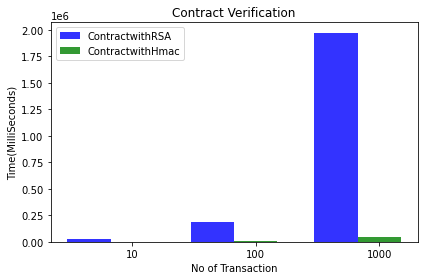

([25583, 187399, 1971734], [664, 4858, 42429])

In [77]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = len(cvrsalist)
means_frank = cvrsalist
means_guido = cvhmaclist

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='ContractwithRSA')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='ContractwithHmac')

plt.xlabel('No of Transaction')
plt.ylabel('Time(MilliSeconds)')
plt.title('Contract Verification')
plt.xticks(index + bar_width, ('10', '100', '1000'))
plt.legend()

plt.tight_layout()
plt.show()
means_frank,means_guido

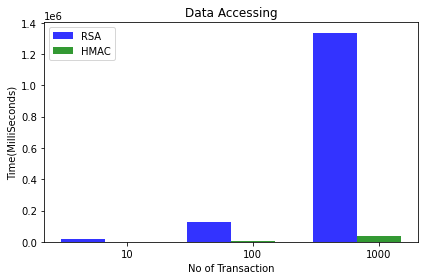

([19223, 123799, 1335734], [604, 4258, 36429])

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# data to plot
n_groups = len(cvrsalist)
info=[10,100,1000]
means_frank = [cvrsalist[i]-(rsa*info[i]) for i in range(len(cvrsalist))]
means_guido =[cvhmaclist[i]-(hmac*info[i]) for i in range(len(cvhmaclist))] 

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
alpha=opacity,
color='b',
label='RSA')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
alpha=opacity,
color='g',
label='HMAC')

plt.xlabel('No of Transaction')
plt.ylabel('Time(MilliSeconds)')
plt.title('Data Accessing')
plt.xticks(index + bar_width, ('10', '100', '1000'))
plt.legend()

plt.tight_layout()
plt.show()
means_frank,means_guido


In [79]:
print("Processing Time for RSA : "+str(rsa))
print("--------------------------------------")
for i in range(len(cvrsalist)):
    print("originalvalue : "+ str(cvrsalist[i]))
    subValue=rsa*info[i]
    print("Subtraction Value: "+str(subValue))
    afterModification=cvrsalist[i]-subValue
    print("After Subtraction: "+str(afterModification))
    print("=============================================")
print("Graph Display Value")
means_frank

Processing Time for RSA : 636
--------------------------------------
originalvalue : 25583
Subtraction Value: 6360
After Subtraction: 19223
originalvalue : 187399
Subtraction Value: 63600
After Subtraction: 123799
originalvalue : 1971734
Subtraction Value: 636000
After Subtraction: 1335734
Graph Display Value


[19223, 123799, 1335734]

In [80]:
print("Processing Time for Hmac : "+str(hmac))
print("--------------------------------------")
for i in range(len(cvhmaclist)):
    print("originalvalue : "+ str(cvhmaclist[i]))
    subValue=hmac*info[i]
    print("Subtraction Value: "+str(subValue))
    afterModification=cvhmaclist[i]-subValue
    print("After Subtraction: "+str(afterModification))
    print("=============================================")
print("Graph Display Result")
means_guido

Processing Time for Hmac : 6
--------------------------------------
originalvalue : 664
Subtraction Value: 60
After Subtraction: 604
originalvalue : 4858
Subtraction Value: 600
After Subtraction: 4258
originalvalue : 42429
Subtraction Value: 6000
After Subtraction: 36429
Graph Display Result


[604, 4258, 36429]

{'RSA': 636, 'HMac': 6}


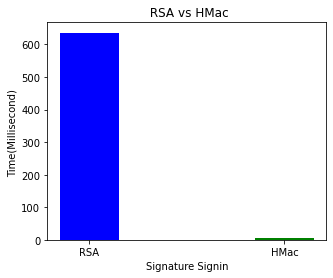

(636, 6)

In [81]:
data_dict = {'RSA':rsa, 'HMac':hmac}
print(data_dict)
courses = list(data_dict.keys())
values = list(data_dict.values())
fig = plt.figure(figsize = (5, 4))
#  Bar plot
plt.bar(courses, values, color =['blue','green'],
        width = 0.3)
plt.xlabel("Signature Signin")
plt.ylabel("Time(Millisecond) ")
plt.title(" RSA vs HMac")
plt.show()
rsa,hmac